In [1]:
#import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import nltk

from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier

set_config(display="diagram")

In [2]:
data = pd.read_csv('Data/Restaurant_Success_Dataset.csv')

In [3]:
pip install NLTK

Note: you may need to restart the kernel to use updated packages.


In [4]:
data.head()

,Restaurant_ID,City,Cuisine_Type,Average_Meal_Price,Seating_Capacity,Years_in_Business,Google_Rating,Social_Media_Followers,Weekend_Reservations,Staff_Count,Delivery_Service,Marketing_Budget,Health_Inspection_Score,Annual_Revenue,Success_Label
0,R0001,Houston,Japanese,49,95,1,3.2,48576,202,33,Yes,3530,59,289190,0
1,R0002,San Francisco,Japanese,30,49,11,3.5,23749,246,46,No,9024,52,58888,1
2,R0003,Chicago,Japanese,24,40,16,3.2,42165,286,32,No,8607,85,1842602,1
3,R0004,San Francisco,Japanese,42,53,18,3.3,27225,236,22,Yes,17126,87,485413,1
4,R0005,San Francisco,Indian,44,60,16,3.2,34858,242,18,Yes,18768,74,1051830,1


In [5]:
data.isnull().sum()

Restaurant_ID              0
City                       0
Cuisine_Type               0
Average_Meal_Price         0
Seating_Capacity           0
Years_in_Business          0
Google_Rating              0
Social_Media_Followers     0
Weekend_Reservations       0
Staff_Count                0
Delivery_Service           0
Marketing_Budget           0
Health_Inspection_Score    0
Annual_Revenue             0
Success_Label              0
dtype: int64

In [6]:
data.drop_duplicates()

,Restaurant_ID,City,Cuisine_Type,Average_Meal_Price,Seating_Capacity,Years_in_Business,Google_Rating,Social_Media_Followers,Weekend_Reservations,Staff_Count,Delivery_Service,Marketing_Budget,Health_Inspection_Score,Annual_Revenue,Success_Label
0,R0001,Houston,Japanese,49,95,1,3.2,48576,202,33,Yes,3530,59,289190,0
1,R0002,San Francisco,Japanese,30,49,11,3.5,23749,246,46,No,9024,52,58888,1
2,R0003,Chicago,Japanese,24,40,16,3.2,42165,286,32,No,8607,85,1842602,1
3,R0004,San Francisco,Japanese,42,53,18,3.3,27225,236,22,Yes,17126,87,485413,1
4,R0005,San Francisco,Indian,44,60,16,3.2,34858,242,18,Yes,18768,74,1051830,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,R0996,Los Angeles,Indian,18,53,13,4.8,14354,165,34,Yes,15795,59,624310,1
996,R0997,New York,Japanese,30,59,19,3.1,14121,208,29,Yes,15337,99,1757135,1
997,R0998,New York,Mexican,33,80,22,2.6,46236,171,23,Yes,15169,56,887329,1
998,R0999,Houston,Indian,43,81,8,3.1,5824,243,12,Yes,11023,70,874470,0


In [7]:
data.describe()

,Average_Meal_Price,Seating_Capacity,Years_in_Business,Google_Rating,Social_Media_Followers,Weekend_Reservations,Staff_Count,Marketing_Budget,Health_Inspection_Score,Annual_Revenue,Success_Label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,29.294000,84.684000,15.589000,3.696400,25094.227000,152.886000,26.902000,10578.363000,75.098000,1.066631e+06,0.681000
std,11.516171,36.899318,8.216056,0.730713,14585.542863,84.100975,12.987882,5666.931338,14.483928,5.512818e+05,0.466322
min,10.000000,20.000000,1.000000,2.500000,160.000000,10.000000,5.000000,511.000000,50.000000,5.137900e+04,0.000000
25%,19.000000,53.000000,9.000000,3.100000,12477.500000,79.000000,15.000000,5727.500000,63.000000,6.123378e+05,0.000000
50%,30.000000,84.000000,16.000000,3.700000,24780.000000,155.000000,27.000000,10714.000000,75.000000,1.071902e+06,1.000000
75%,39.000000,118.000000,23.000000,4.300000,37964.750000,224.000000,38.000000,15787.500000,88.000000,1.534667e+06,1.000000
max,49.000000,149.000000,29.000000,5.000000,49893.000000,299.000000,49.000000,19977.000000,99.000000,1.996918e+06,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_ID            1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Cuisine_Type             1000 non-null   object 
 3   Average_Meal_Price       1000 non-null   int64  
 4   Seating_Capacity         1000 non-null   int64  
 5   Years_in_Business        1000 non-null   int64  
 6   Google_Rating            1000 non-null   float64
 7   Social_Media_Followers   1000 non-null   int64  
 8   Weekend_Reservations     1000 non-null   int64  
 9   Staff_Count              1000 non-null   int64  
 10  Delivery_Service         1000 non-null   object 
 11  Marketing_Budget         1000 non-null   int64  
 12  Health_Inspection_Score  1000 non-null   int64  
 13  Annual_Revenue           1000 non-null   int64  
 14  Success_Label            

In [9]:
df1 = data.drop(columns = ['Delivery_Service', 'City', 'Cuisine_Type', 'Restaurant_ID'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Average_Meal_Price       1000 non-null   int64  
 1   Seating_Capacity         1000 non-null   int64  
 2   Years_in_Business        1000 non-null   int64  
 3   Google_Rating            1000 non-null   float64
 4   Social_Media_Followers   1000 non-null   int64  
 5   Weekend_Reservations     1000 non-null   int64  
 6   Staff_Count              1000 non-null   int64  
 7   Marketing_Budget         1000 non-null   int64  
 8   Health_Inspection_Score  1000 non-null   int64  
 9   Annual_Revenue           1000 non-null   int64  
 10  Success_Label            1000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 86.1 KB


In [10]:
data.isnull().sum()

Restaurant_ID              0
City                       0
Cuisine_Type               0
Average_Meal_Price         0
Seating_Capacity           0
Years_in_Business          0
Google_Rating              0
Social_Media_Followers     0
Weekend_Reservations       0
Staff_Count                0
Delivery_Service           0
Marketing_Budget           0
Health_Inspection_Score    0
Annual_Revenue             0
Success_Label              0
dtype: int64

In [11]:
df1['Success_Label'].value_counts()
#1 = Successful, 0 = Not Successful

1    681
0    319
Name: Success_Label, dtype: int64

C:\Users\marcu\AppData\Local\Temp\ipykernel_86164\4227409044.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


Text(0.5, 1.0, 'Correlation Matrix of the All Features')

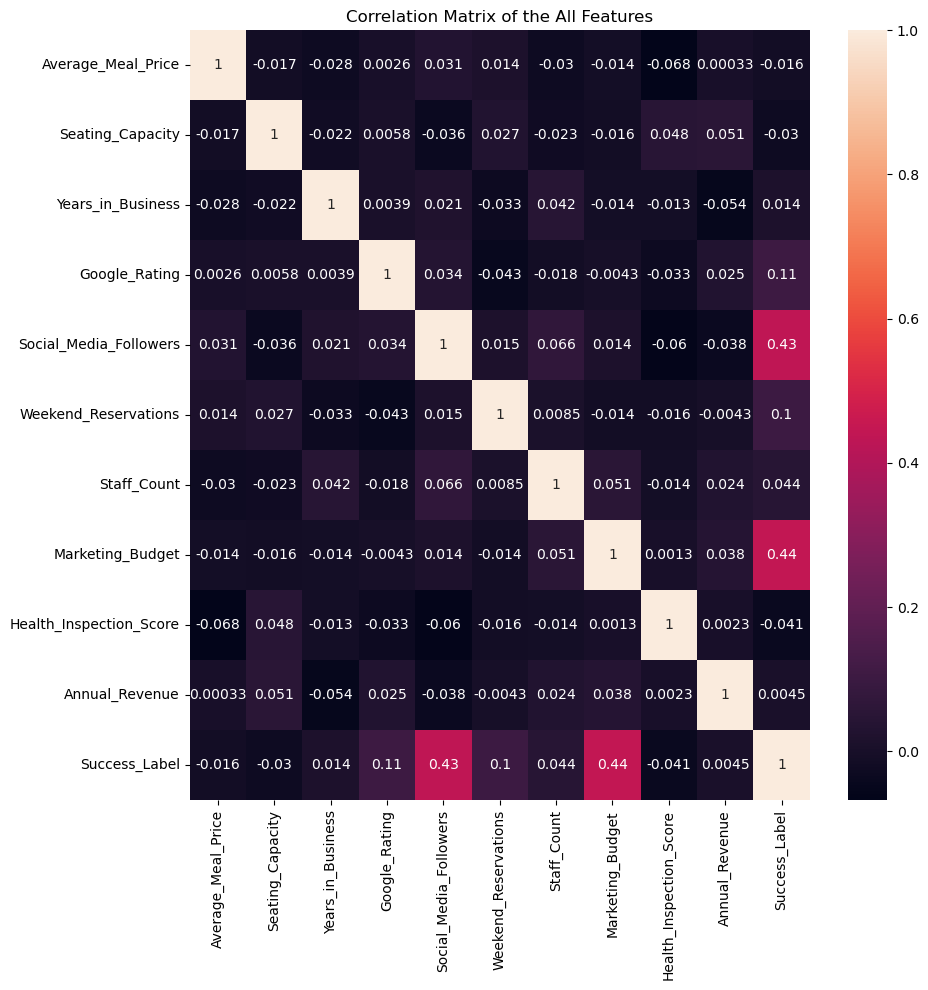

In [12]:
hm = data.corr(numeric_only = True)
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix of the All Features')

Text(0.5, 1.0, 'Correlation Matrix of the Numerical Features')

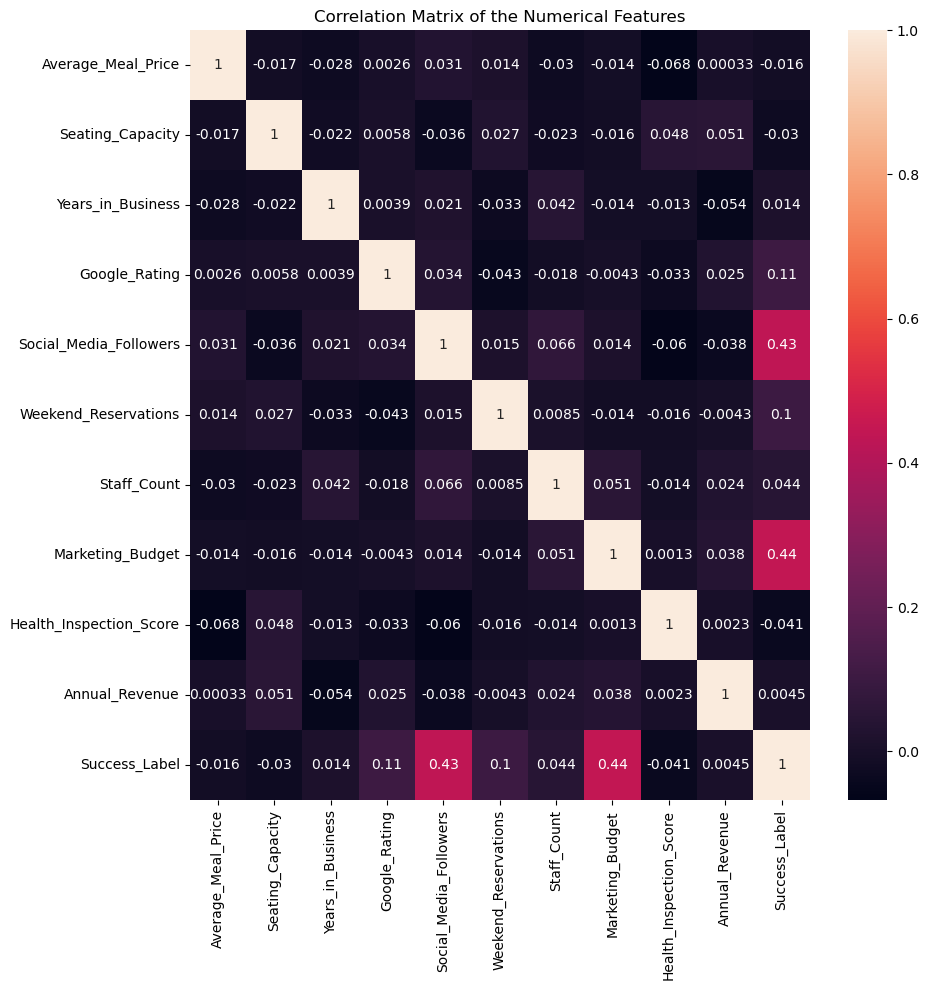

In [13]:
hm1 = df1.corr(numeric_only = True)
plt.figure(figsize=(10, 10))
sns.heatmap(df1.corr(), annot=True)
plt.title('Correlation Matrix of the Numerical Features')

From the two heatmaps shown above, it would heavily suggest that there is not much correlation between these features, other than between marketing budget and social media followers, that would result in a restaurant approach to be successful. Below I will further explore the features to determine whether or not that is the case.

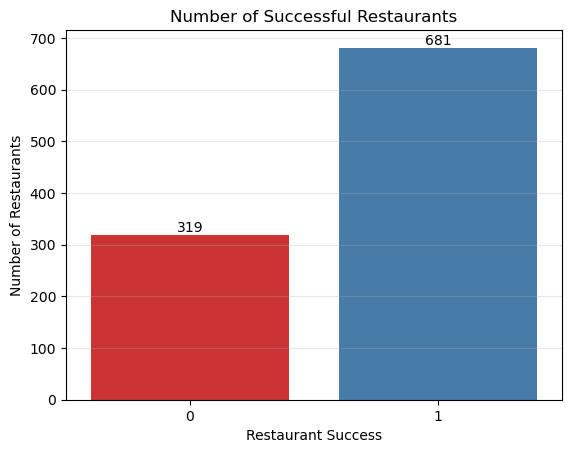

In [14]:
plt1 = sns.countplot(data=df1, x='Success_Label', palette='Set1')

for container in plt1.containers:
    plt1.bar_label(container, fmt='%d')

plt.title('Number of Successful Restaurants')
plt.xlabel('Restaurant Success')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', alpha=.3)
plt.show()

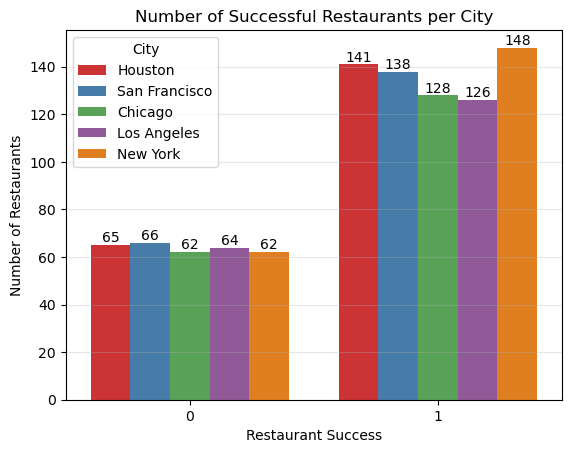

In [15]:
plt2 = sns.countplot(data=data, x='Success_Label', hue = 'City', palette='Set1')

for container in plt2.containers:
    plt2.bar_label(container, fmt='%d')

plt.title('Number of Successful Restaurants per City')
plt.xlabel('Restaurant Success')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', alpha=.3)
plt.show()

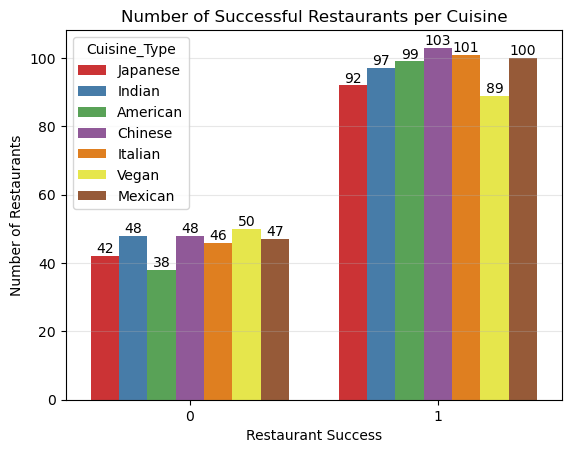

In [16]:
plt3 = sns.countplot(data=data, x='Success_Label', hue = 'Cuisine_Type', palette='Set1')

for container in plt3.containers:
    plt3.bar_label(container, fmt='%d')

plt.title('Number of Successful Restaurants per Cuisine')
plt.xlabel('Restaurant Success')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', alpha=.3)
plt.show()

In addition, there doesn't seem to be any overwhelming categorical relationships from the dataset offered.

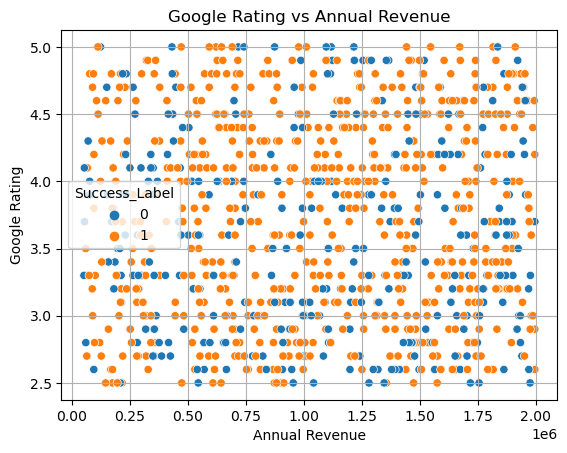

In [17]:
sp1 = sns.scatterplot(data=data, x='Annual_Revenue', y='Google_Rating', hue = 'Success_Label')
plt.title("Google Rating vs Annual Revenue")
plt.xlabel("Annual Revenue")
plt.ylabel("Google Rating")
plt.grid(True)
plt.show()

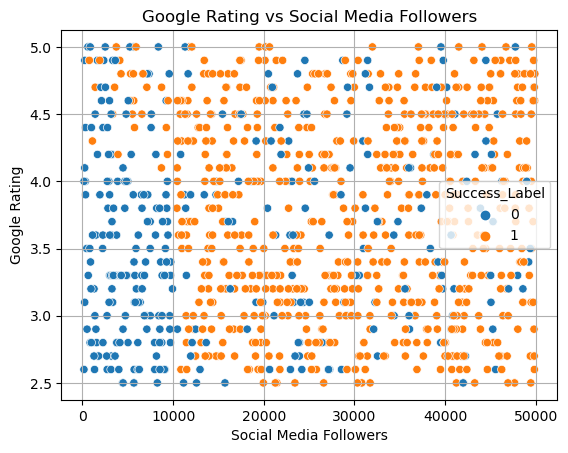

In [18]:
sp2 = sns.scatterplot(data=data, x='Social_Media_Followers', y='Google_Rating', hue = 'Success_Label')
plt.title("Google Rating vs Social Media Followers")
plt.xlabel("Social Media Followers")
plt.ylabel("Google Rating")
plt.grid(True)
plt.show()

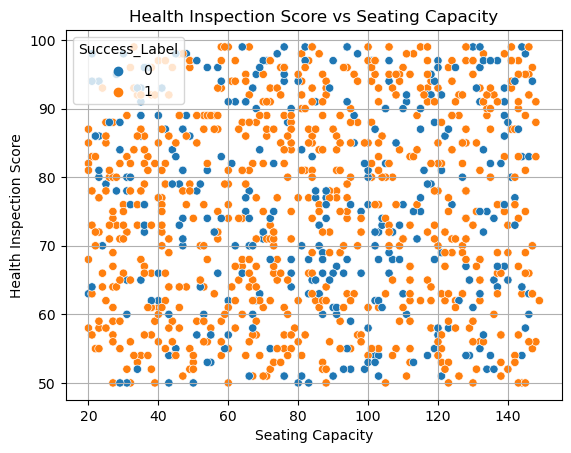

In [19]:
sp3 = sns.scatterplot(data=data, x='Seating_Capacity', y='Health_Inspection_Score', hue = 'Success_Label')
plt.title("Health Inspection Score vs Seating Capacity")
plt.xlabel("Seating Capacity")
plt.ylabel("Health Inspection Score")
plt.grid(True)
plt.show()

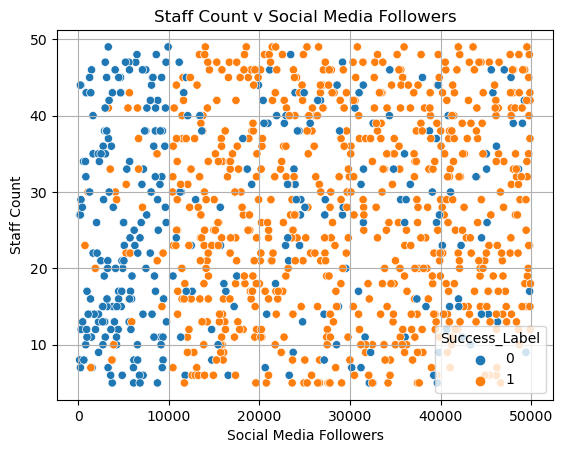

In [20]:
sp4 = sns.scatterplot(data=data, x='Social_Media_Followers', y='Staff_Count', hue = 'Success_Label')
plt.title("Staff Count v Social Media Followers")
plt.xlabel("Social Media Followers")
plt.ylabel("Staff Count")
plt.grid(True)
plt.show()

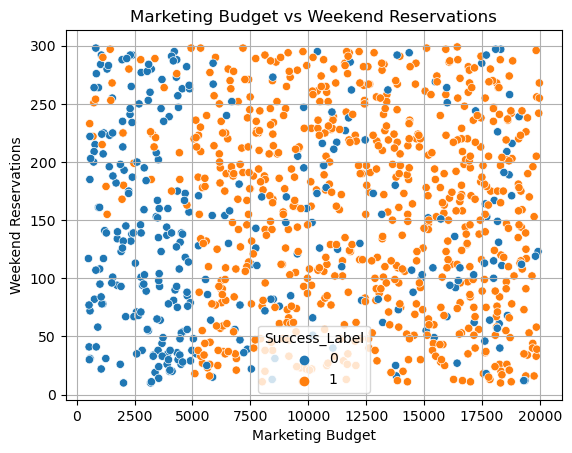

In [21]:
sp6 = sns.scatterplot(data=data, x='Marketing_Budget', y='Weekend_Reservations', hue = 'Success_Label')
plt.title("Marketing Budget vs Weekend Reservations")
plt.xlabel("Marketing Budget")
plt.ylabel("Weekend Reservations")
plt.grid(True)
plt.show()

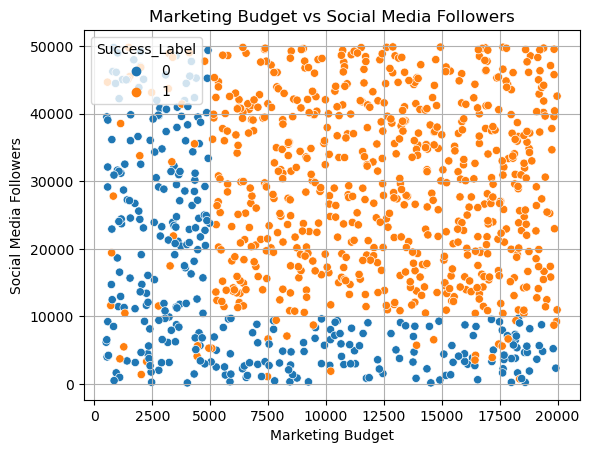

In [22]:
sp6 = sns.scatterplot(data=data, x='Marketing_Budget', y='Social_Media_Followers', hue = 'Success_Label')
plt.title("Marketing Budget vs Social Media Followers")
plt.xlabel("Marketing Budget")
plt.ylabel("Social Media Followers")
plt.grid(True)
plt.show()

From the last scatterplot shown above, it would heavily suggest that marketing budget and social media followers plays a high role in whether a restaurant is successful or not. Although there are some outliers, I imagine the best model to determine whether a restaurant is successful based on the dataset above would be either KNN, SVM, or a tree-based model.

In [23]:
feature_cols_clas = ['Average_Meal_Price', 'Seating_Capacity', 'Years_in_Business', 'Google_Rating', 'Social_Media_Followers', 'Weekend_Reservations', 'Staff_Count', 'Marketing_Budget', 'Health_Inspection_Score', 'Annual_Revenue']
X_c = data[feature_cols_clas]
y_c = data['Success_Label']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_c, y_c, test_size=0.3, random_state=42)

In [24]:
feature_cols_pred = ['Average_Meal_Price', 'Seating_Capacity', 'Years_in_Business', 'Google_Rating', 'Social_Media_Followers', 'Weekend_Reservations', 'Staff_Count', 'Marketing_Budget', 'Health_Inspection_Score', 'Success_Label']
X_p = data[feature_cols_pred]
y_p = data['Annual_Revenue']
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_p, y_p, test_size=0.3, random_state=42)
